In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df= pd.read_csv('housing.csv',delim_whitespace=True,names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

In [19]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


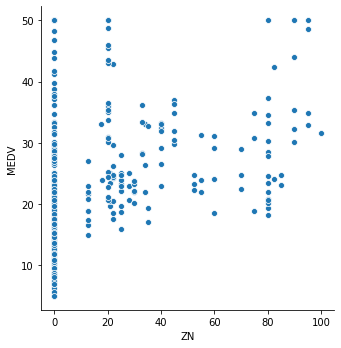

In [166]:
sns.pairplot(x_vars= ['ZN'], y_vars = ['MEDV'], data = df, size = 5)

In [18]:
pd.set_option('display.max_rows',20)

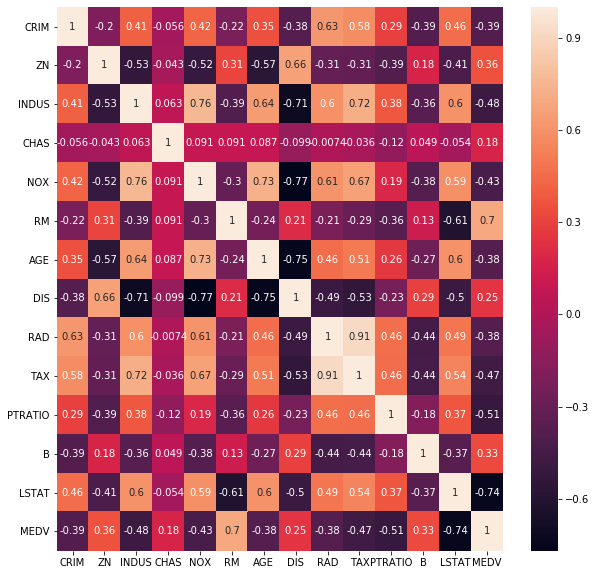

In [55]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot=True,)

<Figure size 720x720 with 0 Axes>

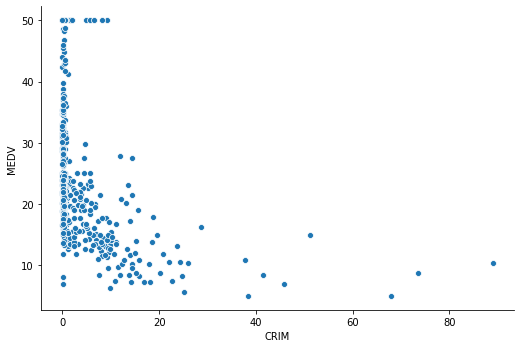

In [35]:
sns.pairplot(df, x_vars=['CRIM'], y_vars = ['MEDV'], size =5, aspect = 1.5)
plt.show()

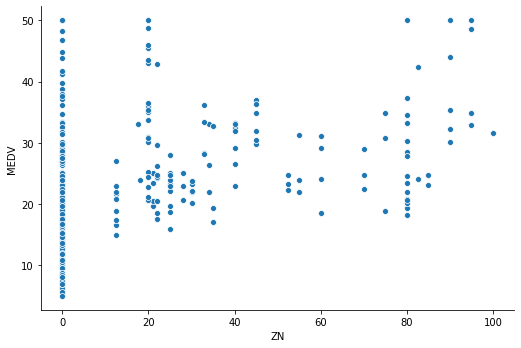

In [36]:
sns.pairplot(df, x_vars=['ZN'], y_vars = ['MEDV'], size =5, aspect = 1.5)
plt.show()

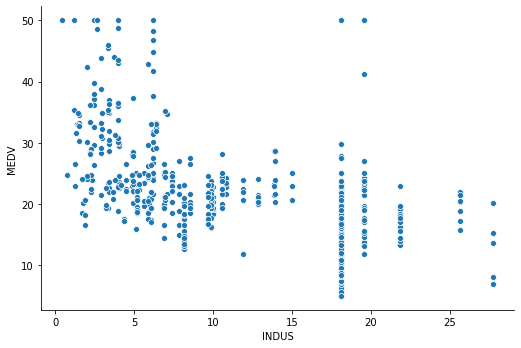

In [37]:
sns.pairplot(df, x_vars=['INDUS'], y_vars = ['MEDV'], size =5, aspect = 1.5)
plt.show()

In [38]:
df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

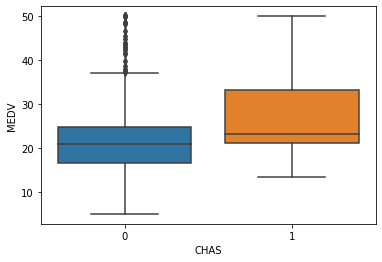

In [47]:
# Housing of price is increasing when it is near to river
sns.boxplot(x=df['CHAS'], y = df['MEDV'])

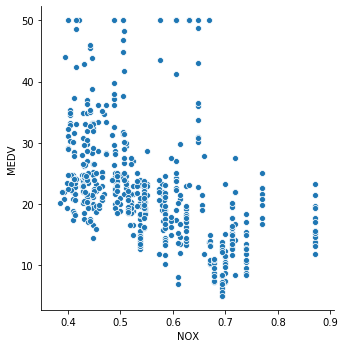

In [49]:
sns.pairplot(df, x_vars=['NOX'], y_vars = ['MEDV'], size =5, aspect = 1)
plt.show()

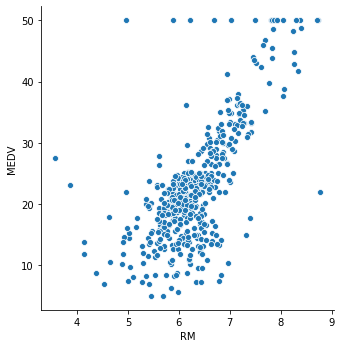

In [50]:
sns.pairplot(df, x_vars=['RM'], y_vars = ['MEDV'], size =5, aspect = 1)
plt.show()

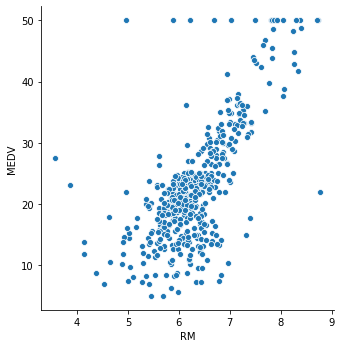

In [52]:
sns.pairplot(df, x_vars=['RM'], y_vars = ['MEDV'], size =5, aspect = 1)
plt.show()

In [156]:
# included normalization and checked the performance of the model
from sklearn import preprocessing
min_max= preprocessing.MinMaxScaler()
x1=min_max.fit_transform(x)
pd.DataFrame(x1)

from sklearn.model_selection import train_test_split
x = df.drop(['MEDV','AGE'],axis =1)
y = df['MEDV']
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size = 0.7,random_state = 101)
lm = LinearRegression()
lm.fit(x_train,y_train)
predict = lm.predict(x_test)
print('r2 score', r2_score(y_test,predict))
print('mean_squared_error', mean_squared_error(y_test,predict))

r2 score 0.719017366704944
mean_squared_error 25.378048127347267


In [109]:
df2 = pd.get_dummies(df['RAD'])

In [112]:
df3 = x.drop(['RAD'], axis=1)

In [114]:
df4 = pd.concat([df2,df3],axis=1)

In [121]:
df4

,1,2,3,4,5,6,7,8,24,CRIM,...,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,1,0,0,0,0,0,0,0,0,0.00632,...,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0,1,0,0,0,0,0,0,0,0.02731,...,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0,1,0,0,0,0,0,0,0,0.02729,...,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0,0,1,0,0,0,0,0,0,0.03237,...,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0,0,1,0,0,0,0,0,0,0.06905,...,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1,0,0,0,0,0,0,0,0,0.06263,...,11.93,0,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67
502,1,0,0,0,0,0,0,0,0,0.04527,...,11.93,0,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08
503,1,0,0,0,0,0,0,0,0,0.06076,...,11.93,0,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64
504,1,0,0,0,0,0,0,0,0,0.10959,...,11.93,0,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48


In [120]:
from sklearn.model_selection import train_test_split
x = df.drop(['MEDV','AGE'],axis =1)
y = df['MEDV']
x_train,x_test,y_train,y_test = train_test_split(x2,y,test_size = 0.7,random_state = 101)
lm = LinearRegression(normalize=True)
lm.fit(x_train,y_train)
predict = lm.predict(x_test)
print('r2 score', r2_score(y_test,predict))
print('mean_squared_error', mean_squared_error(y_test,predict))

r2 score 0.7226956407397005
mean_squared_error 25.045830387108488


In [ ]:
df

In [105]:
from sklearn.model_selection import train_test_split
x = df.drop(['MEDV','AGE'],axis =1)
y = df['MEDV']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.7,random_state = 101)
lm = LinearRegression()
lm.fit(x_train,y_train)
predict = lm.predict(x_test)
print('r2 score', r2_score(y_test,predict))
print('mean_squared_error', mean_squared_error(y_test,predict))

r2 score 0.7187740759108757
mean_squared_error 25.400021889242794


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [58]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [61]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [62]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [64]:
lm.fit(x_train,y_train)
r2_score(y_test,predict)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
x_train_sm = x_train.drop(['INDUS'], axis = 1)

x_train_sm = sm.add_constant(x_train_sm)
RF = sm.OLS(y_train,x_train_sm).fit()
RF.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     36.71
Date:                Tue, 24 Dec 2019   Prob (F-statistic):           4.73e-37
Time:                        20:24:32   Log-Likelihood:                -425.33
No. Observations:                 151   AIC:                             876.7
Df Residuals:                     138   BIC:                             915.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.5066      9.400      4.309      0.000      21.921      59.093
CRIM          -0.0988      0.040     -2.460      0.015      -0.178      -0.019
ZN             0.0629      0.025      2.556      0.012       0.014       0.112
CHAS           3.3085      1.562      2.118      0.036       0.220       6.397
NOX          -17.0742      6.767     -2.523      0.013     -30.454      -3.694
RM             3.0291      0.803      3.770      0.000       1.440       4.618
AGE           -0.0050      0.021     -0.235      0.815      -0.048       0.037
DIS           -1.5116      0.313     -4.827      0.000      -2.131      -0.892
RAD            0.3479      0.117      2.976      0.003       0.117       0.579
TAX           -0.0179      0.006     -2.868      0.005      -0.030      -0.006
PTRATIO       -0.8335      0.230     -3.616      0.000      -1.289      -0.378
B              0.0099      0.004      2.204      0.029       0.001       0.019
LSTAT         -0.5203      0.092     -5.655      0.000      -0.702      -0.338
==============================================================================
Omnibus:                       96.318   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              852.590
Skew:                           2.137   Prob(JB):                    7.28e-186
Kurtosis:                      13.828   Cond. No.                     1.72e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
from sklearn.metrics import r2_score, mean_squared_error

In [75]:
predict = lm.predict(x_test)

In [76]:
r2_score(y_test,predict)

0.7187740759108757

In [122]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

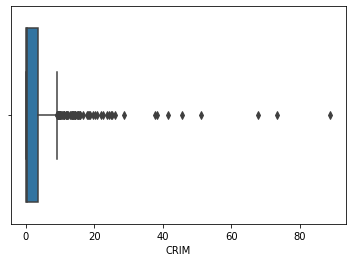

In [129]:
sns.boxplot(df['CRIM'])

In [249]:
k = df5.loc[:,'CRIM':].copy()

In [271]:
def outliers(l,v):
    q25,q75 = np.percentile(v,25), np.percentile(v,75)
    print('name of column',l)
    iqr = q75-q25
    print('iqr', iqr)
    lower = q25 - 1.5*iqr
    print('lower quartile range',lower)
    upper = q75+1.5*iqr
    print('upper quartile range', upper)
    count_low = [mn for mn in v if (mn<lower) and (mn>upper)]
    print(count_low)
    print('len:', len(count_low))
    k = k[(k[l]>lower) & (k[l]<upper)]
    print(len(k))

In [273]:
k.to_csv('check.csv')

In [266]:
 [(k['CRIM']>-5.31) & (k['CRIM']<9.06)]

[0      True
 1      True
 2      True
 3      True
 4      True
        ... 
 501    True
 502    True
 503    True
 504    True
 505    True
 Name: CRIM, Length: 506, dtype: bool]

In [218]:
df5 = df4.drop(['CHAS'],axis=1)

In [237]:
k.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33


In [272]:
for l in k.columns:
    outliers(l,k[l].values)

name of column CRIM
iqr 3.5950374999999997
lower quartile range -5.310511249999999
upper quartile range 9.06963875
[]
len: 0


UnboundLocalError: local variable 'k' referenced before assignment

In [240]:
k.shape

(440, 11)